In [10]:
# DATA_DIR = "D:/ml_data/stackexchange/"
DATA_DIR = "C:/Users/marinch/Source/repos/sentence-embedding-demos/tag_curation/ml_data/stackexchange"

import pandas as pd

In [2]:
csv_file = 'ai_Posts.csv'

ai_posts = pd.read_csv(csv_file)

def combine_title_and_body(title, body):
    # I'm having trouble getting over the fact that a missing string has a numeric type.
    if title==title: # not NaN
        text = title + ' ' + body
    elif body == body:
        text = body
    else:
        text = ''
    return str(text)

ai_posts['text'] = [ combine_title_and_body(row.title, row.body) for idx, row in ai_posts.iterrows()]

In [3]:
from InstructorEmbedding import INSTRUCTOR
model = INSTRUCTOR('hkunlp/instructor-large')
sentence = "3D ActionSLAM: wearable person tracking in multi-floor environments"
instruction = "Represent the Science title:"
embeddings = model.encode([[instruction,sentence]])
print(embeddings)

c:\Users\marinch\Miniconda3\envs\mladsjune2023cuda117\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


load INSTRUCTOR_Transformer
max_seq_length  512
[[-6.15552627e-02  1.04199881e-02  5.88439591e-03  1.93768740e-02
   5.71417958e-02  2.57655699e-02 -4.01915095e-05 -2.80044414e-02
  -2.92965472e-02  4.91884910e-02  6.78200424e-02  2.18692347e-02
   4.54528630e-02  1.50187118e-02 -4.84451987e-02 -3.25259827e-02
  -3.56492773e-02  1.19935377e-02 -6.83915662e-03  3.03126238e-02
   5.17491773e-02  3.48140411e-02  4.91033541e-03  6.68928623e-02
   1.52824344e-02  3.54217030e-02  1.07743666e-02  6.89828917e-02
   4.44019549e-02 -3.23419459e-02  1.24267926e-02 -2.15528030e-02
  -1.62690841e-02 -4.15058322e-02 -2.42290879e-03 -3.07157799e-03
   4.27047350e-02  1.56428497e-02  2.57813148e-02  5.92843294e-02
  -1.99174136e-02  1.32361846e-02  1.08408080e-02 -4.00610566e-02
  -1.36213598e-03 -1.57032683e-02 -2.53812186e-02 -1.31972935e-02
  -7.83779938e-03 -1.14008989e-02 -4.82025407e-02 -2.58416254e-02
  -4.98769991e-03  4.98239584e-02  1.19490102e-02 -5.55060469e-02
  -2.82120276e-02 -3.3220879

In [4]:
instruction = "Represent the AI document for classification:"
embeddings = model.encode([[instruction,sentence]])
print(embeddings)

[[-5.81402332e-02  7.20523810e-03  3.80407553e-03  2.02455875e-02
   5.94068356e-02  2.72778720e-02  6.19684299e-03 -2.05716472e-02
  -2.82432772e-02  4.79073972e-02  6.48194477e-02  2.16513593e-02
   3.92502211e-02  1.52985528e-02 -4.94726710e-02 -3.80594581e-02
  -3.35397832e-02  6.98450999e-03 -3.59800365e-03  3.02730370e-02
   5.00123277e-02  3.51080820e-02  7.43056182e-03  6.42502084e-02
   1.81745104e-02  3.68924849e-02  3.47956107e-03  7.42488801e-02
   4.09231633e-02 -3.48232128e-02  7.89864163e-04 -2.35165656e-02
  -1.73166264e-02 -3.85985561e-02  6.08439231e-03 -1.34084066e-02
   4.17104699e-02  2.39232164e-02  2.01099534e-02  6.13473356e-02
  -2.37492174e-02  1.38548920e-02  1.28523670e-02 -4.10010330e-02
   1.93893327e-03 -2.00247765e-02 -2.65862010e-02 -5.64958202e-03
  -1.22418152e-02 -6.95753051e-03 -4.64767553e-02 -2.35219914e-02
  -1.75058830e-03  4.74112928e-02  1.43560255e-02 -5.33968769e-02
  -2.49953922e-02 -3.41698043e-02  2.12819446e-02 -5.54798618e-02
  -6.07642

In [6]:
ai_posts_text_array = ai_posts['text'].values
ai_posts_text_array

array(['What is "backprop"? What does "backprop" mean? Is the "backprop" term basically the same as "backpropagation" or does it have a different meaning?\n',
       'How does noise affect generalization? Does increasing the noise in data help to improve the learning ability of a network? Does it make any difference or does it depend on the problem being solved? How is it affect the generalization process overall?\n',
       '"Backprop" is the same as "backpropagation": it\'s just a shorter way to say it. It is sometimes abbreviated as "BP".\n',
       ...,
       "One of the key features of ChatGPT is its ability to maintain context and provide coherent responses to prompts that refer to previous information. This is enabled by the use of a recurrent neural network (RNN) architecture, which allows the model to process input text in a sequential manner and maintain a state or hidden representation that captures information about the previous inputs.\nIn the case of ChatGPT, the RNN arc

In [7]:
# replace each array element with a list of two elements
ai_posts_text_array = [ [instruction, text] for text in ai_posts_text_array]

In [11]:
import time
start = time.time()

# ai_posts['vector'] = sentxformer.encode(ai_posts['text'].values).tolist()
ai_posts['vector'] = model.encode(ai_posts_text_array).tolist()

end = time.time()
print(f'featurization took {end - start: 0.3f} seconds')

featurization took  3550.359 seconds


In [12]:
featurized_file = DATA_DIR + csv_file.replace('.csv', '_featurized_instructor-large.csv')

ai_posts.to_csv(featurized_file, index=False) # ~400MB

# ai_posts = pd.read_csv(featurized_file)
# ai_posts['vector'] = [eval(v) for v in ai_posts['vector']]

ai_posts['tags']

0        neural-networks;backpropagation;terminology;de...
1        neural-networks;machine-learning;statistical-a...
2                                                      NaN
3        neural-networks;hyperparameter-optimization;ar...
4                 philosophy;definitions;intelligent-agent
                               ...                        
23174                                                  NaN
23175                                                  NaN
23176                                                  NaN
23177                             neural-networks;homework
23178              search;constraint-satisfaction-problems
Name: tags, Length: 23179, dtype: object

In [13]:
from collections import Counter

all_tags = []
for tag_str in ai_posts['tags'].values:
    if tag_str == tag_str: # not NaN
        tags = tag_str.split(';')
        all_tags.extend(tags)
    

len(all_tags) # 36223

Counter(all_tags).most_common(100)

[('neural-networks', 2333),
 ('reinforcement-learning', 2200),
 ('machine-learning', 2100),
 ('deep-learning', 1804),
 ('convolutional-neural-networks', 1067),
 ('natural-language-processing', 628),
 ('reference-request', 453),
 ('computer-vision', 450),
 ('deep-rl', 446),
 ('comparison', 430),
 ('classification', 426),
 ('training', 411),
 ('terminology', 376),
 ('q-learning', 354),
 ('recurrent-neural-networks', 334),
 ('python', 324),
 ('tensorflow', 320),
 ('dqn', 309),
 ('papers', 306),
 ('image-recognition', 278),
 ('long-short-term-memory', 270),
 ('ai-design', 265),
 ('datasets', 251),
 ('objective-functions', 250),
 ('keras', 240),
 ('game-ai', 238),
 ('backpropagation', 236),
 ('math', 227),
 ('generative-adversarial-networks', 220),
 ('object-detection', 210),
 ('optimization', 207),
 ('definitions', 197),
 ('gradient-descent', 188),
 ('transformer', 186),
 ('applications', 184),
 ('markov-decision-process', 183),
 ('pytorch', 180),
 ('philosophy', 179),
 ('agi', 178),
 ('po

In [14]:
# Choose a variety of interesting and reasonably common tags
target_tags = ['philosophy', 'proofs', 'q-learning', 'deep-rl',  'superintelligence', 'classification']

for tt in target_tags:
    flag_col = tt + '_flag'
    ai_posts[flag_col] = [1 if tt in str(tag_str) else 0 for tag_str in ai_posts['tags'].values]

In [15]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
import numpy as np

tag_name = 'classification'
flag_col = tag_name + '_flag'
score_col = tag_name + '_score'

X_all = [v for v in ai_posts['vector']]
y_all = [f for f in ai_posts[flag_col]]

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.25, random_state=42)

Cs = np.logspace(-4, 4, 5)

clf = LogisticRegressionCV(Cs=Cs, max_iter=10000)
clf.fit(X_train, y_train)

score_test = clf.predict_proba(X_test)[:,1]

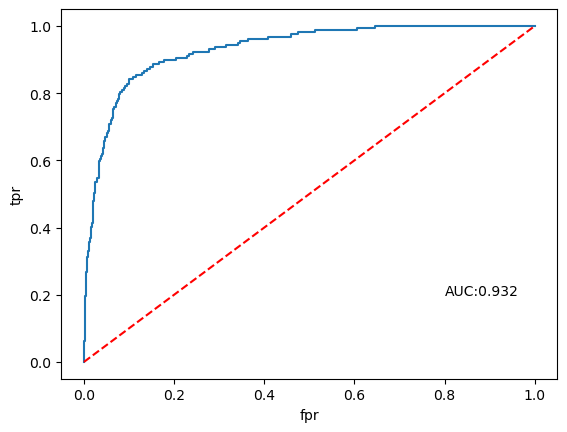

In [16]:
from sklearn import metrics
import matplotlib.pyplot as plt

def plot_auc(labels, scores):
    fpr, tpr, thresholds = metrics.roc_curve(labels, scores)

    auc = metrics.roc_auc_score(labels, scores)

    plt.plot(fpr, tpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.plot([0, 1], [0, 1],'r--')
    plt.text(0.8, 0.2, f"AUC:{auc:0.3f}")

plot_auc(y_test, score_test)

In [17]:
ai_posts[score_col] = clf.predict_proba(X_all)[:,1]

In [18]:
pd.set_option('display.max_colwidth', None)
show_cols = ['text', flag_col, score_col]

# Highest scoring examples that do not have the tag
ai_posts[ai_posts[flag_col]==0].sort_values(score_col, ascending=False).head(10)[show_cols]

,text,classification_flag,classification_score
5178,"How should I label the classes in RNA? I have a project, which is the keyboard biometrics of users.\nsuppose I have 3 users, \nI do not know how to label in two types of class, (+ 1, -1). \nIf I want to verify the identity to user1, my idea of ​​class designation would be:\n TIMES LABEL\nuser 1\n9.4 9.2 1.0 3.4 0.5 1\n9.4 9.2 1.0 3.4 0.5 1\n9.4 9.2 1.0 3.4 0.5 1\n9.4 9.2 1.0 3.4 0.5 1\n9.4 9.2 1.0 3.4 0.5 1\n\nuser 2\n0.1 3.2 1.0 1.2 1.7 -1\n3.4 1.2 3.0 1.1 2.8 -1\n2.4 2.2 3.0 1.6 2.9 -1\n1.4 3.2 2.0 2.6 3.6 -1\n3.4 0.2 3.0 2.7 3.5 -1\n\nuser N\n0.2 1.4 4.5 3.7 2.9 -1\n9.2 1.5 7.6 2.6 2.6 -1\n9.3 1.6 7.5 2.9 3.4 -1\n9.8 3.8 6.6 2.8 2.5 -1\n9.8 2.8 1.7 3.8 1.6 -1\n\nbut as my system has more and more users classes -1 will be too many compared to classes +1,\nHow should I label the classes?\n",0,0.579249
22664,"Fine tuning a Deep Learning model post training I have trained a CNN in a binary classification problem, however the original problem has 6 different classes, of which, I am only interested in classifying one, so if it is that certain class or not.in this case, let's say class 2.\nAfter looking closely into the model's performance on test dataset, I have found that the model confuses class 2 with class 1 often. Is it common practice, to make a balanced dataset from the data that I have only from class 1 and class 2, and further train the model on that dataset? Are there any pieces of research/papers on this? If no, what other possible solutions would there be, of course other than making a new model?\n",0,0.543569
15362,"How to verify classification model trained on classification dataset on a detection dataset for classification purpose? I am working on a problem that involves two tasks - detection and classification. There is no single dataset for both tasks. I am training two models, separate on detection dataset and another on classification dataset. I use the images from the detection dataset as input and get classification predictions on top of detected bounding boxes.\nDataset description :\n\nClassification - Image of the single object (E.g. Car) in the center with a classification label.\nDetection - Image with multiple objects (E.g. 4 Cars) with bounding box annotations.\n\nTask - Detect objects(e.g. cars) from detection datasets and classify them into various categories.\nHow do I verify whether the classification model trained on the classification dataset is working on images from detection dataset? (In terms of classification accuracy)\nI cannot manually label the images from the detection dataset for individual class labels. (Need expert domain knowledge)\nHow do I verify my classification model?\nIs there any technique to do this ? Like domain transfer or any weakly-supervised method ?\n",0,0.542196
21808,"Multiclass image classification - what approach to use and which models to consider? I'm working on an image classification project and I need to train a multiclass, multilabel classifier. The dataset is large and some of the images are mislabeled (for a given class, some labels are pretty easy to mix up). As an approach, I am using the following:\n\nConsidering the main available models, check their accuracy for the considered dataset at different learning rates. More in detail, my approach is to take a pretrained model, remove the last layer and fine-tune it on the dataset we're considering.\nConsider the model and learning rate which gives the highest accuracy.\nImprove the accuracy by grouping classes that are often confused. This is done by looking at the confusion matrix.\n\nDo you think this is a good approach to use? And which models should I consider in the first place? As of now I'm looking into the ResNet family (18, 34, 50, 101, 152 layers) and visual transformers.\n",0,0.439736
9894,"Do models train better if the labelling information is more specific (or dense)? I'm working on a project where there is a limited dataset of videos (about 20

In [19]:
# Lowest scoring examples that do have the tag
ai_posts[ai_posts[flag_col]==1].sort_values(score_col, ascending=True).head(10)[show_cols]

,text,classification_flag,classification_score
1644,"Is there a measure of AI relative strength, modified by resources? For instance, Strength/Size$\times$Speed, where size and speed refer to memory and processing.\nWe now have very strong, narrow AI, but they tend to run on fast hardware without volume restrictions.\nTo understand why I'm asking, this article on BBC may provide some insight: ""Which life form dominates Earth?"" (If I was a betting man, I'd put money on tardigrades outlasting humans, and the secret of their success is that they require minimal resources and processing power, unlike higher-order automata.)\n",1,0.006850
11443,"Language Learning feedback with AI Is there a program under development that uses AI technology, like Siri, to ""hold hands"" so to speak with a language learner and coach them on accent, colloqiual expressions, or to let them guide the language learning process using an archive of language knowledge? \nAlso, could this sort of program be used to learn things in a language one already knows, or in a new language, say for the purposes of travel or to learn about related hyperlinks in an online database?\n",1,0.007639
17709,"Why do we use the softmax instead of no activation function? Why do we use the softmax activation function on the last layer?\nSuppose $i$ is the index that has the highest value (in the case when we don't use softmax at all). If we use softmax and take $i$th value, it would be the highest value because $e$ is an increasing function, so that's why I am asking this question. Taking argmax(vec) and argmax(softmax(vec)) would give us the same value.\n",1,0.009153
16816,"What is the definition of the hinge loss function? I came across the hinge loss function for training a neural network model, but I did not know the analytical form for the same.\nI can write the mean squared error loss function (which is more often used for regression) as\n$$\sum\limits_{i=1}^{N}(y_i - \hat{y_i})^2$$\nwhere $y_i$ is the desired output in the dataset, $\hat{y_i}$ is the actual output by the model, and $N$ is the total number of instances in our dataset.\nSimilarly, what is the (basic) expression for hinge loss function?\n",1,0.009729
2298,"Detect patterns in sequences of actions I have to analyse sequences of actions that look more or less like this JSON blob. The question I'm trying to answer is whether there are recurring (sub)patterns that different users adopt when asked to perform a certain specific task -- in this case, the task is to build a mathematical formula using this editor. In particular I'd like to know if there are multiple significantly different ways in which people build the same expression.\nI thought of creating a Markov model, but that would only give me the most likely sequence of actions of length N. An obvious alternative would be to build trees and count how many times a certain path occurs in the dataset. However, the nature of the expression-building process means that the sequences can be polluted by many confounding, non-significant actions (such as streaks of UNDO-REDO, deleting symbols, and the likes).\nI might go the ""longest common subsequence"" route, but I'm not sure that would tell me if there are ""significantly different"" ways of building the same expression (in quotes because, for now, I don't have a rigorous definition of ""significantly different"", but, for example, one way would be to drag and drop-in-place all the symbols in the correct order, and another way would be to drag all the symbols onto the canvas, and then place them in the correct spots).\nI thought this might be a nice challenge for some AI algorithm, but I'm quite a noob at that, so I'm open to suggestions.\n",1,0.010670
17192,"Why the number of training points to densely cover the space grows exponentially with the dimension? In this lecture (minute 42), the professor says that the number of training examples we need to densely cover the space of training vectors grows exponentia